**summary of Combined Cycle Power Plant dataset:**

*Key Dataset Characteristics:*

9,568 data points
Collected over 6 years (2006-2011)
No missing values
All measurements taken during full load operation
Data is provided in multiple shuffled versions for cross-validation

Temperature (AT)

Environmental temperature measurement
Range: 1.81°C to 37.11°C
Affects gas turbine performance
Continuous variable


**Exhaust Vacuum (V)**


Range: 25.36 to 81.56 cm Hg
Measured in centimeters of mercury
Specifically affects the steam turbine performance
Continuous variable


**Ambient Pressure (AP)**


Atmospheric pressure measurement
Range: 992.89 to 1033.30 milibar
Affects gas turbine performance
Continuous variable


**Relative Humidity (RH)**


Moisture content in the air
Range: 25.56% to 100.16%
Affects gas turbine performance
Continuous variable

**Target Variable:**

Plant Electrical Output (PE)
Range: 420.26 to 495.76 MW (Megawatts)
This is what the features are used to predict





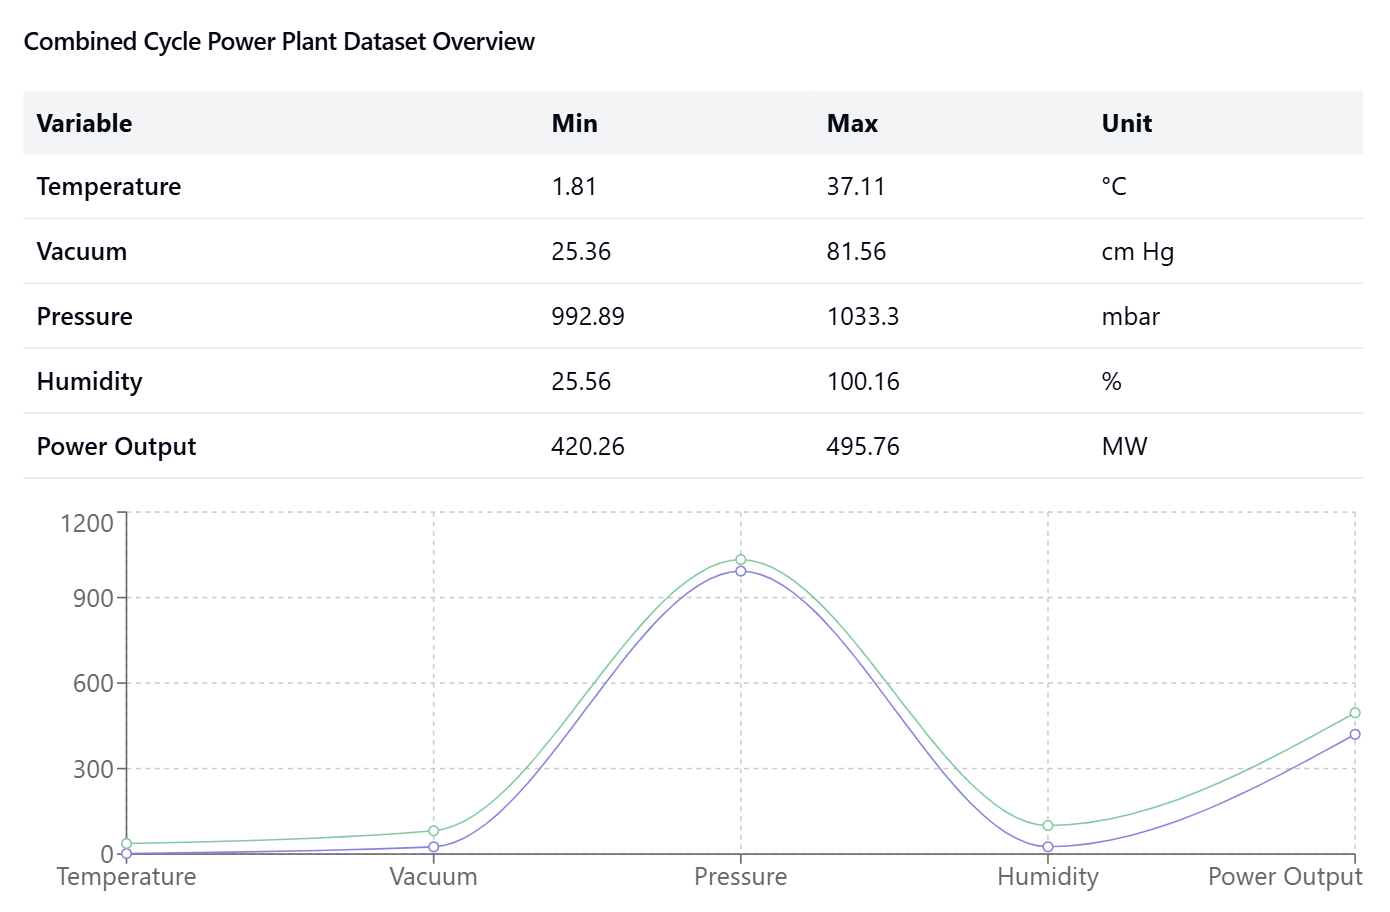

In [23]:
import requests
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
# General libraries
import numpy as np
import pandas as pd
import os
import joblib

# Preprocessing
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error




# Machine Learning
from sklearn.linear_model import QuantileRegressor



In [3]:
  # shared link
shared_link = 'https://docs.google.com/spreadsheets/d/1wWErSOv1DHyPZTewxdndstsGnvIUJbMQ/edit?usp=drive_link&ouid=106070647382123604863&rtpof=true&sd=true'

# Extract the file ID from the shared link
file_id = shared_link.split('/')[-2]
download_link = f'https://drive.google.com/uc?export=download&id={file_id}'

# Download the data set
response = requests.get(download_link)

# Save the Data temporarily (you can delete it later)
with open('Combined cycle power plant.xlsx', 'wb') as f:
    f.write(response.content)
data=pd.read_excel('Combined cycle power plant.xlsx')
data.head(20)


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


In [5]:
data.info(),data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


(None,
                 AT            V           AP           RH           PE
 count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
 mean     19.651231    54.305804  1013.259078    73.308978   454.365009
 std       7.452473    12.707893     5.938784    14.600269    17.066995
 min       1.810000    25.360000   992.890000    25.560000   420.260000
 25%      13.510000    41.740000  1009.100000    63.327500   439.750000
 50%      20.345000    52.080000  1012.940000    74.975000   451.550000
 75%      25.720000    66.540000  1017.260000    84.830000   468.430000
 max      37.110000    81.560000  1033.300000   100.160000   495.760000)

In [6]:

# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)


AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64


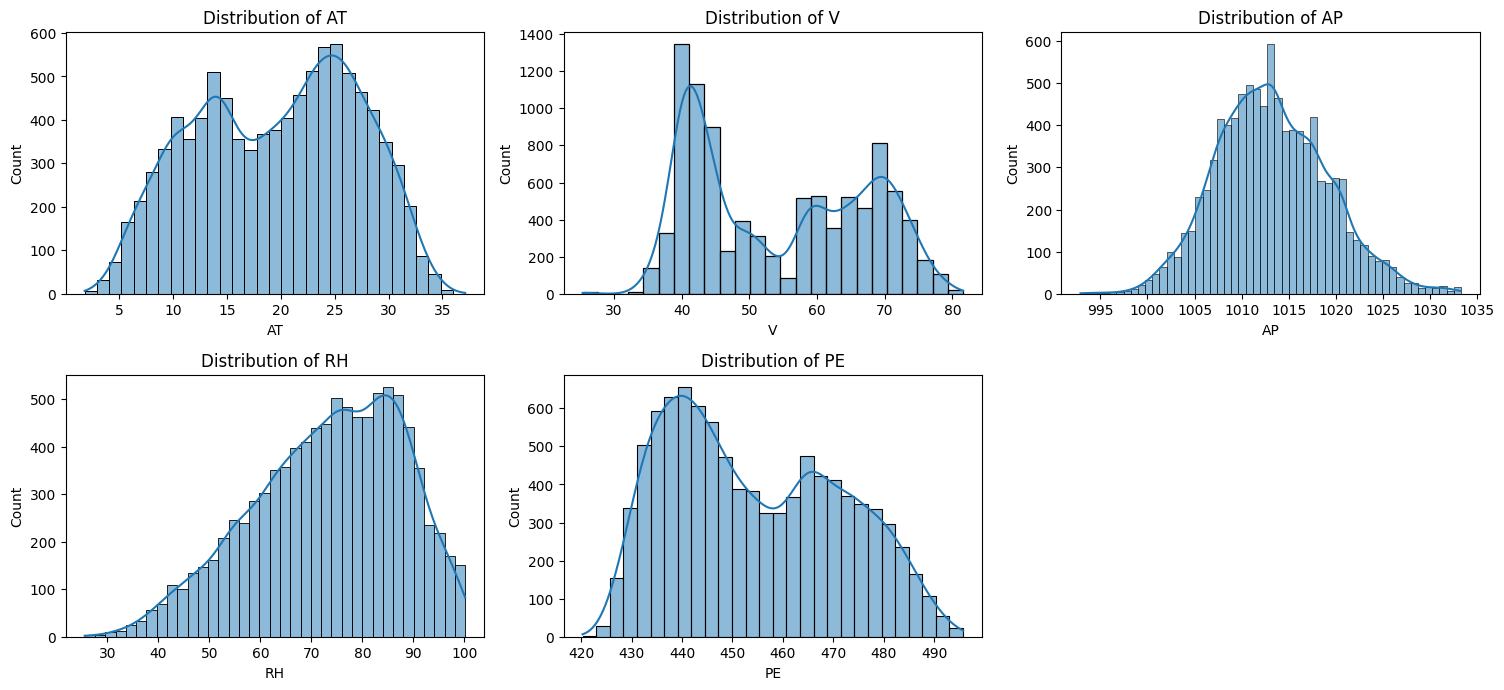

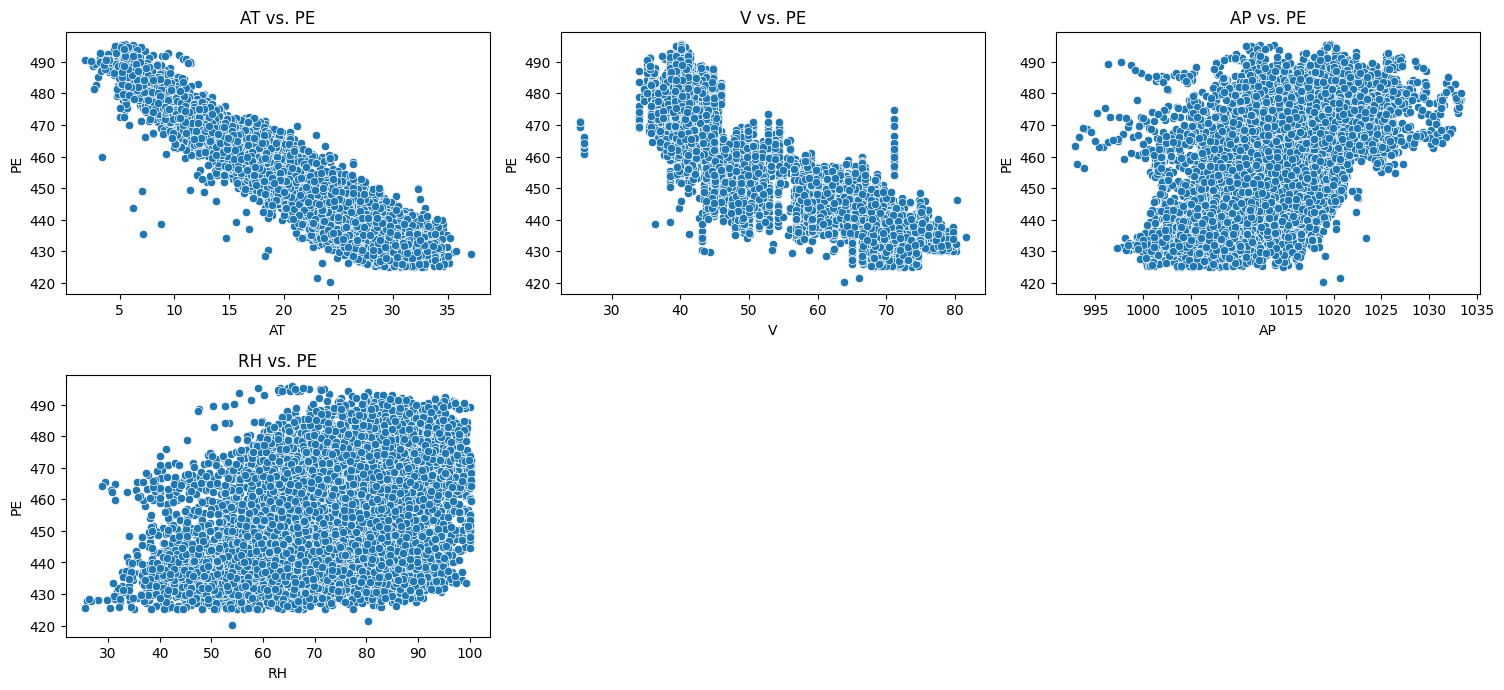

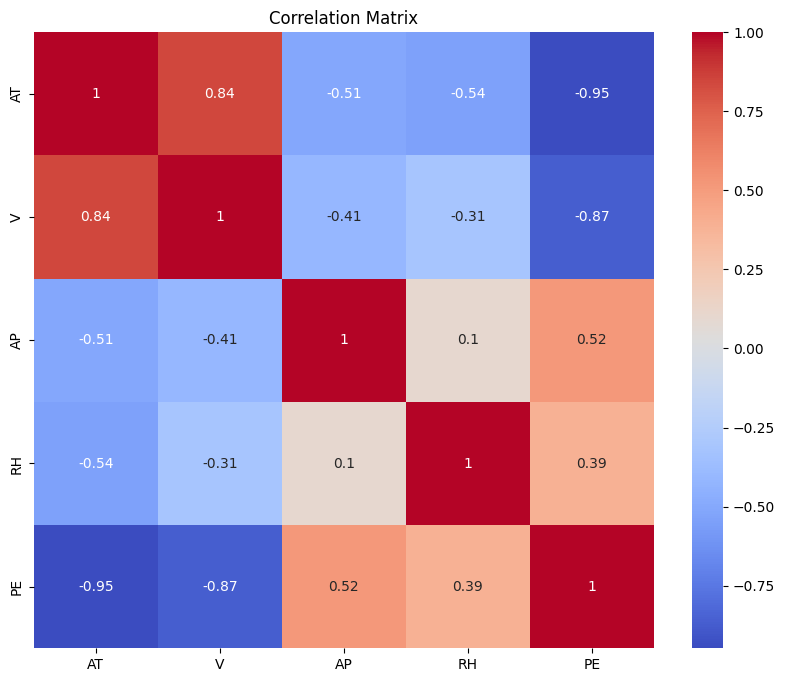

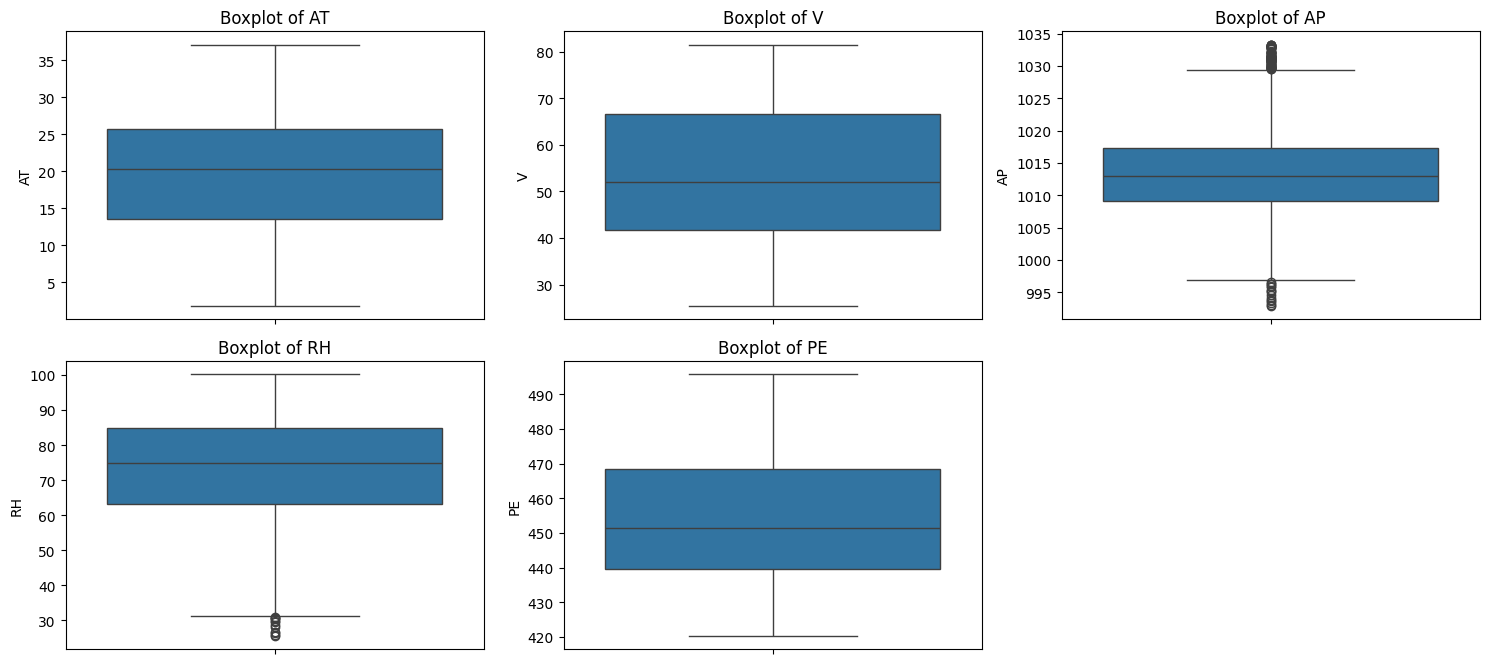

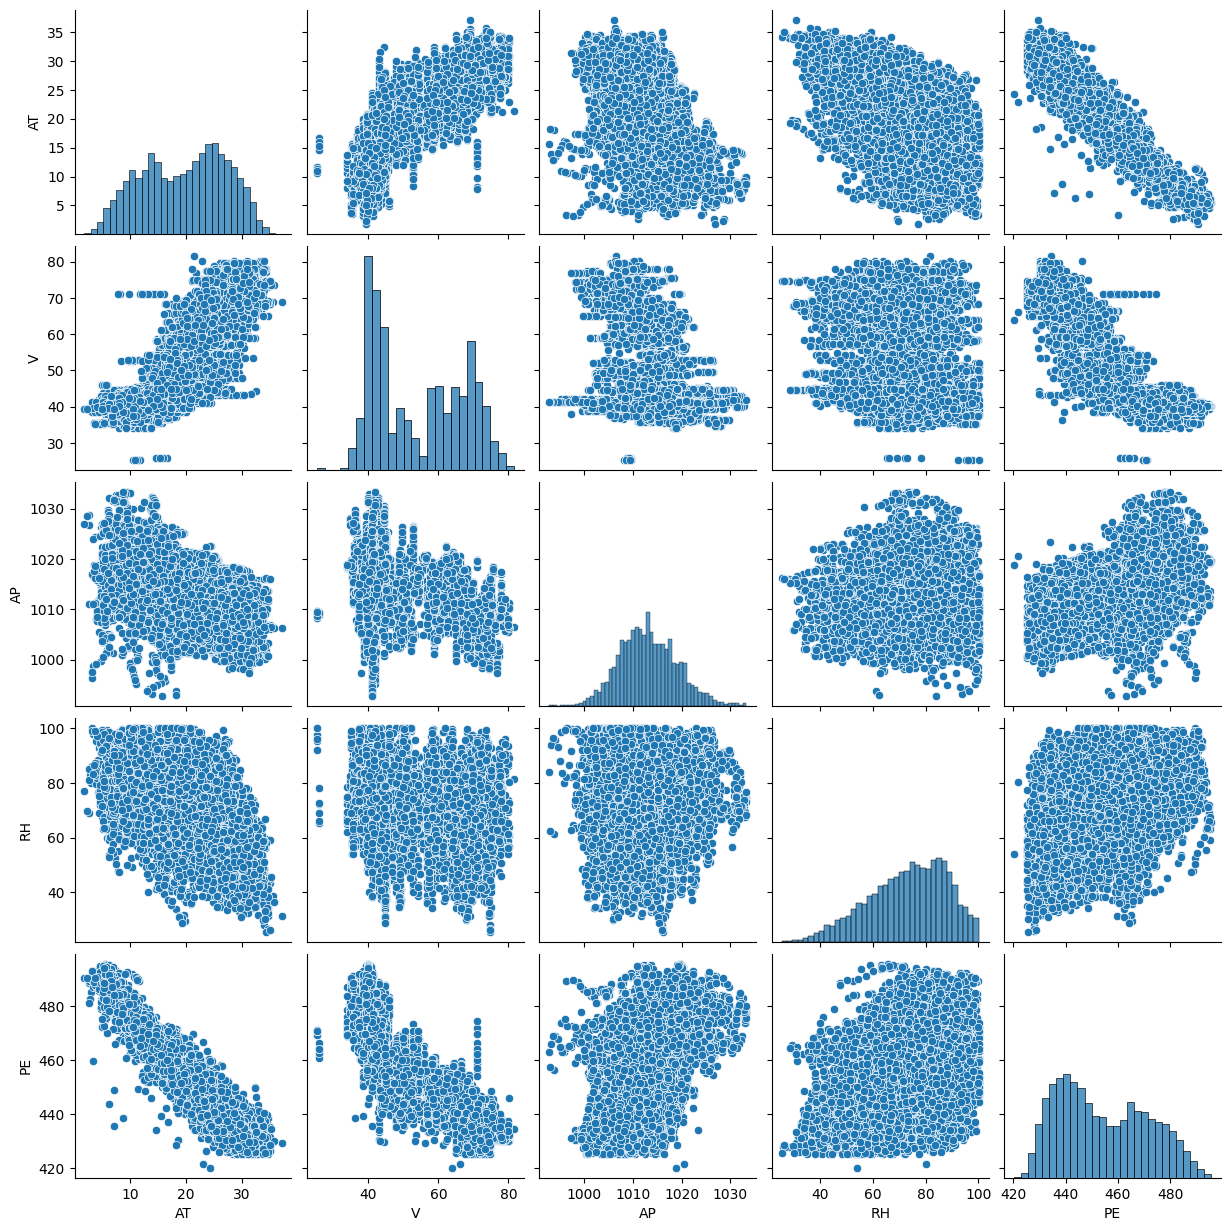

In [7]:

# Visualize the distribution of each feature
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


# Visualize the relationship between features and target variable (PE)
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.columns[:-1]):  # Exclude the target variable itself
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=col, y='PE', data=data)
    plt.title(f'{col} vs. PE')
plt.tight_layout()
plt.show()

# Create a correlation matrix heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Boxplots to visualize potential outliers in each feature
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Pairplot to visualize relationships between all pairs of features
sns.pairplot(data)
plt.show()

In [15]:

# Split features (X) and target (y)
X = data.drop('PE', axis=1)
y = data['PE']


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Create and train a Quantile Regression model
quantile_model = QuantileRegressor(quantile=0.5, solver='highs') # You can change the quantile
quantile_model.fit(X_train, y_train)

# Make predictions
quantile_predictions = quantile_model.predict(X_test)
joblib.dump(quantile_model, 'quantile_model.pkl')

# Evaluate the quantile regression model
r2_quantile = r2_score(y_test, quantile_predictions)
mae_quantile = mean_absolute_error(y_test, quantile_predictions)

print(f"Quantile Regression Model MAE: {mae_quantile}, R-squared: {r2_quantile}")

Quantile Regression Model MAE: 4.230037026445746, R-squared: 0.9030606166144654


In [25]:

# Load the saved model
loaded_model = joblib.load('quantile_model.pkl')

# Sample new data (replace with your actual data)
new_data = pd.DataFrame({
    'AT': [14.96],
    'V': [41.76],
    'AP': [1024.07],
    'RH': [73.17]
})

# Make predictions on the new data
new_predictions = loaded_model.predict(new_data)

print(f"New Predictions: {new_predictions}")

New Predictions: [466.26724988]
